In [1]:

import os, sys
from pathlib import Path

import pandas as pd
import openpyxl
from matplotlib import pyplot as plt

# the top level location of the project code
CURRENT_DIR_STR = os.path.abspath("")
CURRENT_DIR_PATH = Path(CURRENT_DIR_STR)
sys.path.append(CURRENT_DIR_PATH)
DATA_DIR_STR = os.path.join(CURRENT_DIR_STR, "data")
DATA_DIR_PATH = Path(DATA_DIR_STR)
sys.path.append(DATA_DIR_PATH)

from libs.bags2tons import bags2tonnes

In [2]:
# read the producer-exporter .json file into a dataframe

country_file_path = Path(os.path.join(DATA_DIR_STR, "prod_exp.json"))
prod_df = pd.DataFrame.transpose(pd.read_json(country_file_path))

#prod_df

In [3]:
# set up string variables for the required dataframes
# facilites bulk processing later...

# Total production by all exporting countries in thousand 60kg bags
c_1a = "Total production by all exporting countries in thousand 60kg bags"
xl_1a = "1a - Total production.xlsx"
df1a = "df1a"

# Domestic consumption by all exporting countries in thousand 60kg bags
c_1b = "Domestic consumption by all exporting countries in thousand 60kg bags"
xl_1b = "1b - Domestic consumption.xlsx"
df1b = "df1b"
'''
# Gross opening stocks in all exporting countries in thousand 60kg bags
c_1d = "Gross opening stocks in all exporting countries in thousand 60kg bags"
xl_1d = "1d - Gross Opening stocks.xlsx"
df1d = "df1d"

# Total exports by all exporting countries in thousand 60kg bags
c_1e = "Total exports by all exporting countries in thousand 60kg bags"
xl_1e = "1e - Exports - crop year.xlsx"
df1e = "df1e"
'''
# Exports of all forms of coffee by all exporting countries in thousand 60kg bags
c_2a = "Exports of all forms of coffee by all exporting countries in thousand 60kg bags"
xl_2a = "2a - Exports - calendar year.xlsx"
df2a = "df2a"

# Imports by selected importing countries in thousand 60-kg bags
c_2b = "Imports by selected importing countries in thousand 60-kg bags"
xl_2b = "2b - Imports.xlsx"
df2b = "df2b"

# Re-exports by selected importing  countries in thousand 60-kg bags
c_2c = "Re-exports by selected importing  countries in thousand 60-kg bags"
xl_2c = "2c - Re-exports.xlsx"
df2c = "df2c"
'''
# Prices paid to growers in exporting countries in US cents/lb
c_3a = "Prices paid to growers in exporting countries in US cents/lb"
xl_3a = "3a - Prices paid to growers.xlsx"
df3a = "df3a"

# Retail prices of roasted coffee in selected importing countries in US$/lb
c_3b = "Retail prices of roasted coffee in selected importing countries in US$/lb"
xl_3b = "3b - Retail prices.xlsx"
df3b = "df3b"

# ICO composite and group indicator prices (annual and monthly averages) in US cents/lb
c_3c = "ICO composite and group indicator prices (annual and monthly averages) in US cents/lb"
xl_3c = "3c - Indicator prices.xlsx"
df3c = "df3c"
'''
# Inventories of green coffee in selected importing countries in thousand 60-kg bags
c_4a = "Inventories of green coffee in selected importing countries in thousand 60-kg bags"
xl_4a = "4a - Inventories.xlsx"
df4a = "df4a"  

# Disappearance (consumption) in selected importing countries in thousand 60-kg bags
c_4b = "Disappearance (consumption) in selected importing countries in thousand 60-kg bags"
xl_4b = "4b - Disappearance.xlsx"
df4b = "df4b"
'''
# Imports by all importing non-member countries in thousand 60-kg bags
c_5a = "Imports by all importing non-member countries in thousand 60-kg bags"
xl_5a = "5a - Non-member imports.xlsx"
df5a = "df5a"

# Re-exports by all importing non-member countries in thousand 60-kg bags
c_5b = "Re-exports by all importing non-member countries in thousand 60-kg bags"
xl_5b = "5b - Non-member re-exports.xlsx"
df5b = "df5b"
'''


'\n# Imports by all importing non-member countries in thousand 60-kg bags\nc_5a = "Imports by all importing non-member countries in thousand 60-kg bags"\nxl_5a = "5a - Non-member imports.xlsx"\ndf5a = "df5a"\n\n# Re-exports by all importing non-member countries in thousand 60-kg bags\nc_5b = "Re-exports by all importing non-member countries in thousand 60-kg bags"\nxl_5b = "5b - Non-member re-exports.xlsx"\ndf5b = "df5b"\n'

In [4]:
# read the xlsx files into dataframes

# this is the full set
"""
file_strings = [xl_1a, xl_1b, xl_1d, xl_1e, xl_2a, xl_2b,
                xl_2c, xl_3a, xl_3b, xl_3c, xl_4a, xl_4b, xl_5a, xl_5b]
dataframes = [df1a, df1b, df1d, df1e, df2a, df2b, df2c, df3a, df3b, df3c, df4a, df4b, df5a, df5b]
"""
# restricting the data file reads to the required subset
file_strings = [xl_1a, xl_1b, xl_2a, xl_2b, xl_2c, xl_4a, xl_4b]
dataframes = [df1a, df1b, df2a, df2b, df2c, df4a, df4b]

for fdata in range(len(file_strings)):
    file_path = Path(os.path.join(DATA_DIR_STR, file_strings[fdata]))
    globals()[dataframes[fdata]] = pd.read_excel(
        file_path, engine="openpyxl").fillna(0)

c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
# drop the superfluous rows in each data frame

df1a.drop([0, 15, 23, 58], inplace=True)
df1b.drop([0, 15, 23, 58], inplace=True)
df2a.drop([55], inplace=True)
df2b.drop([0, 3, 36], inplace=True)
df2c.drop([0, 3, 36], inplace=True)
#df3a.drop([55], inplace=True)
#df3b.drop([55], inplace=True)
#df3c.drop([55], inplace=True)
df4a.drop([0, 1, 19, 20], inplace=True)
df4b.drop([0, 36], inplace=True)
#df5a.drop([55], inplace=True)
#df5b.drop([55], inplace=True)

In [6]:
# change the Country column names
# reset the df1a and df1b year names

df1a.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003", "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)
df1b.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003", "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)
df2a.rename(columns={"Calendar years": "Country"}, inplace=True)
df2b.rename(columns={"Calendar years": "Country"}, inplace=True)
df2c.rename(columns={"Calendar years": "Country"}, inplace=True)
df4a.rename(columns={"At the end of December": "Country"}, inplace=True)
df4b.rename(columns={"Calendar years": "Country"}, inplace=True)

In [7]:
# sort the dataframes by Country and strip white space from country names

df1a.sort_values(by=["Country"], inplace=True)
df1b.sort_values(by=["Country"], inplace=True)
df2a.sort_values(by=["Country"], inplace=True)
df2b.sort_values(by=["Country"], inplace=True)
df2b["Country"] = df2b["Country"].apply(lambda x: x.strip())
df2c.sort_values(by=["Country"], inplace=True)
df2c["Country"] = df2c["Country"].apply(lambda x: x.strip())
df4a.sort_values(by=["Country"], inplace=True)
df4b.sort_values(by=["Country"], inplace=True)


In [8]:
# reset the index to iso code for df1a

iso_code = []

for i, drow in df1a.iterrows():
    for j, prow in prod_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break;

df1a["iso_code"] = iso_code
df1a.set_index(["iso_code"], inplace=True)

#df1a


In [9]:
# reset the index to iso code for df1b

iso_code = []

for i, drow in df1b.iterrows():
    for j, prow in prod_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break;

df1b["iso_code"] = iso_code
df1b.set_index(["iso_code"], inplace=True)
#df1b

In [10]:
# reset the index to iso code for df2a

iso_code = []

for i, drow in df2a.iterrows():
    for j, prow in prod_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break;

df2a["iso_code"] = iso_code
df2a.set_index(["iso_code"], inplace=True)

#df2a


In [11]:
# reset the index to iso code for df4a
'''
iso_code = []

for i, drow in df4a.iterrows():
    for j, prow in prod_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df4a["iso_code"] = iso_code
df4a.set_index(["iso_code"], inplace=True)

# df4a
'''


'\niso_code = []\n\nfor i, drow in df4a.iterrows():\n    for j, prow in prod_df.iterrows():\n        if drow["Country"] == prow["country"]:\n            iso_code.append(j)\n            break\n\ndf4a["iso_code"] = iso_code\ndf4a.set_index(["iso_code"], inplace=True)\n\n# df4a\n'

In [12]:
# reset the index to iso code for df4b
'''
iso_code = []

for i, drow in df4b.iterrows():
    for j, prow in prod_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df4b["iso_code"] = iso_code
df4b.set_index(["iso_code"], inplace=True)
'''
# df4b


'\niso_code = []\n\nfor i, drow in df4b.iterrows():\n    for j, prow in prod_df.iterrows():\n        if drow["Country"] == prow["country"]:\n            iso_code.append(j)\n            break\n\ndf4b["iso_code"] = iso_code\ndf4b.set_index(["iso_code"], inplace=True)\n'

In [13]:
# read the importer exporter .json file into a dataframe
#country_file_path = Path(os.path.join(DATA_DIR_STR, "imp_exp.json"))
#imp_exp_df = pd.DataFrame.transpose(pd.read_json(country_file_path))
#imp_exp_df

In [14]:
# reset the index to iso code for df2b
'''
iso_code = []

for i, drow in df2b.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break;

df2b["iso_code"] = iso_code
df2b.set_index(["iso_code"], inplace=True)
'''
#df2b

'\niso_code = []\n\nfor i, drow in df2b.iterrows():\n    for j, prow in imp_exp_df.iterrows():\n        if drow["Country"] == prow["country"]:\n            iso_code.append(j)\n            break;\n\ndf2b["iso_code"] = iso_code\ndf2b.set_index(["iso_code"], inplace=True)\n'

In [15]:
# reset the index to iso code for df2c
'''
iso_code = []

for i, drow in df2c.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
             iso_code.append(j)
             break;

df2c["iso_code"] = iso_code
df2c.set_index(["iso_code"], inplace=True)
'''
#df2c


'\niso_code = []\n\nfor i, drow in df2c.iterrows():\n    for j, prow in imp_exp_df.iterrows():\n        if drow["Country"] == prow["country"]:\n             iso_code.append(j)\n             break;\n\ndf2c["iso_code"] = iso_code\ndf2c.set_index(["iso_code"], inplace=True)\n'

600000.0


c:\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


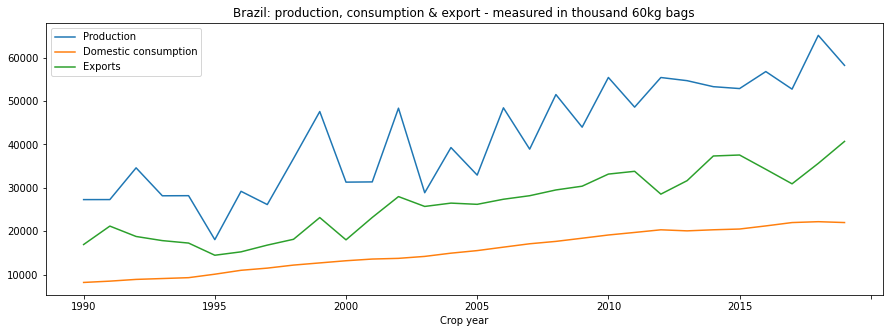

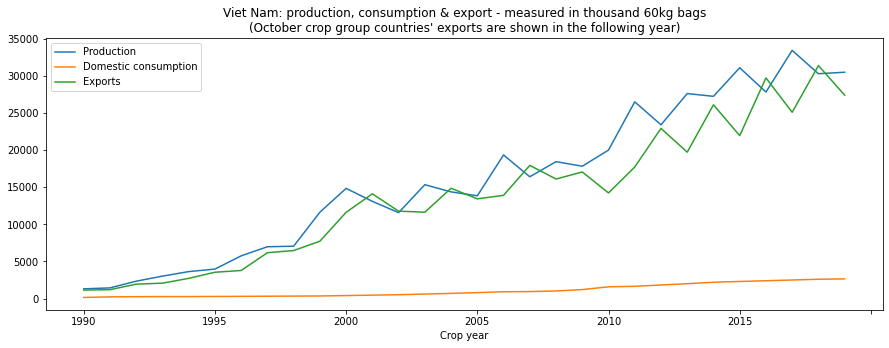

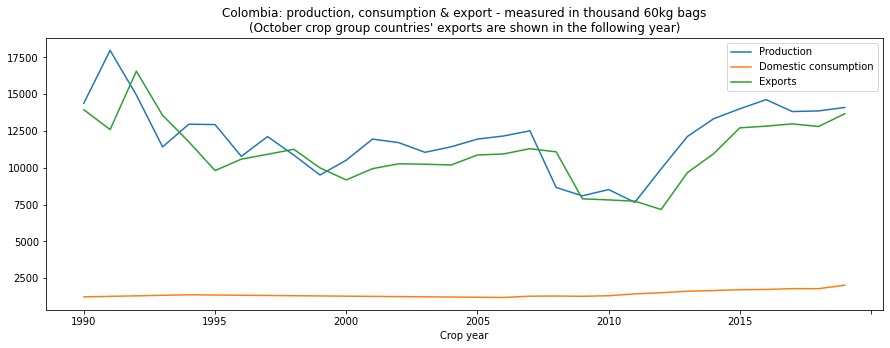

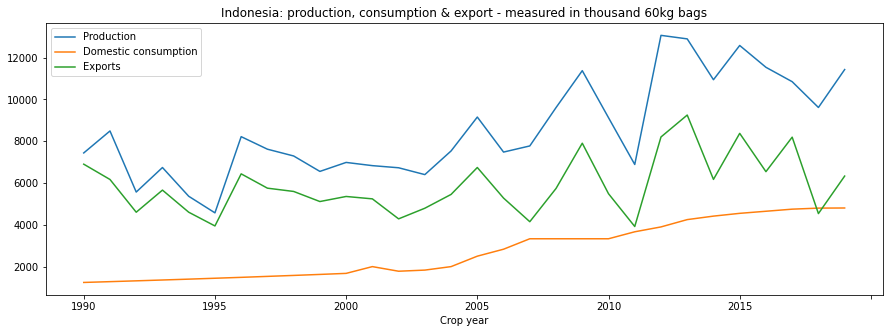

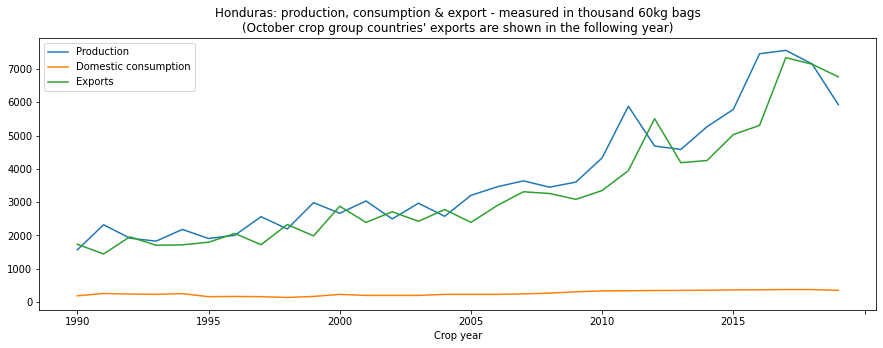

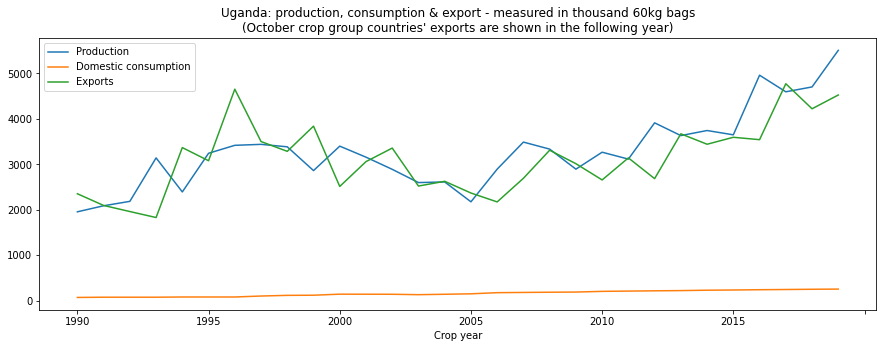

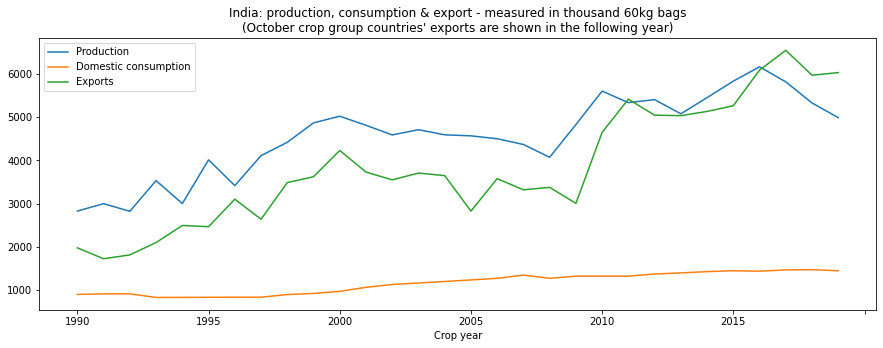

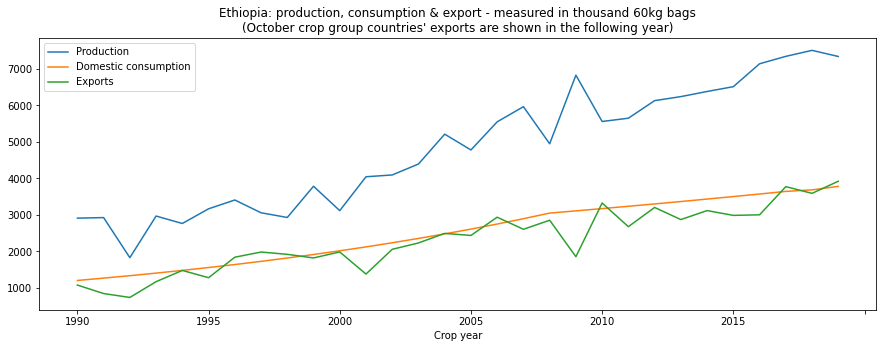

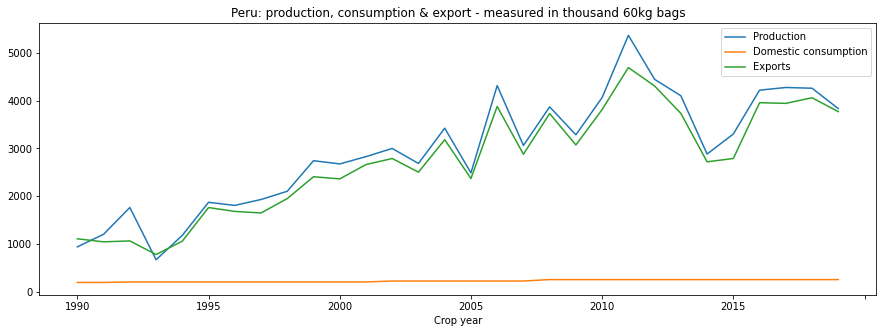

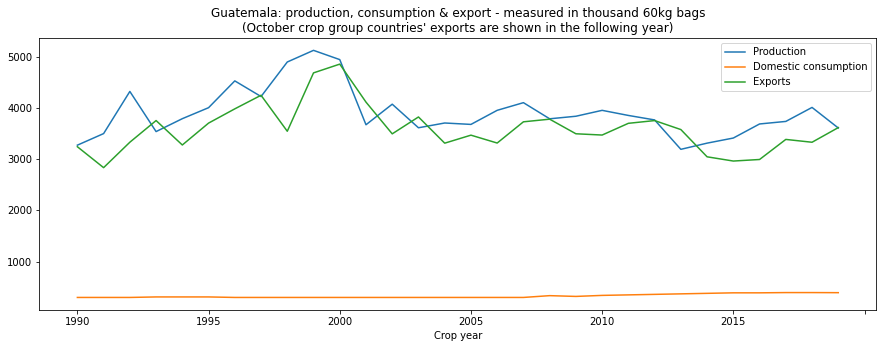

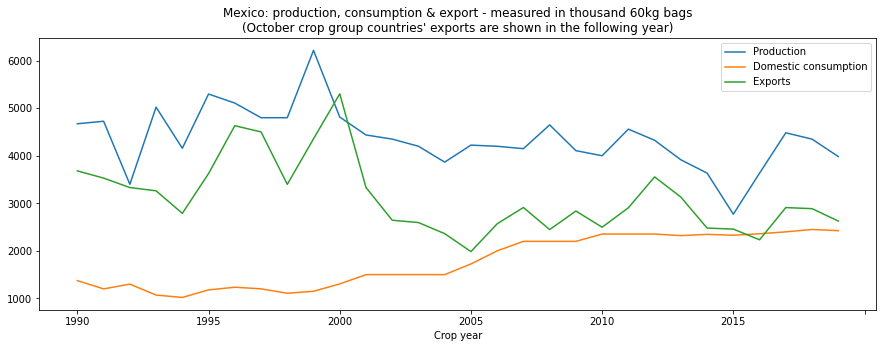

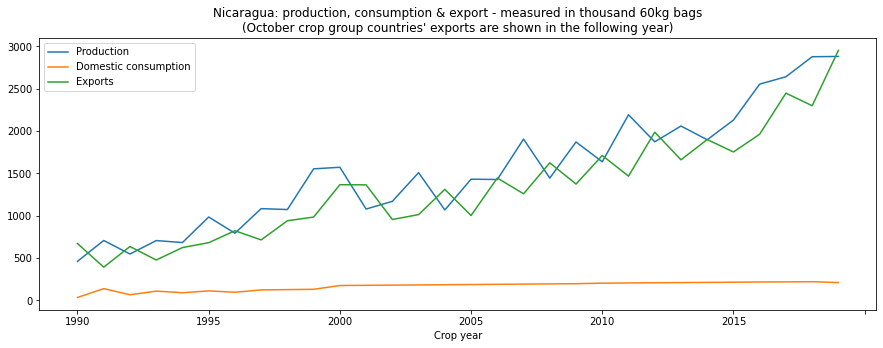

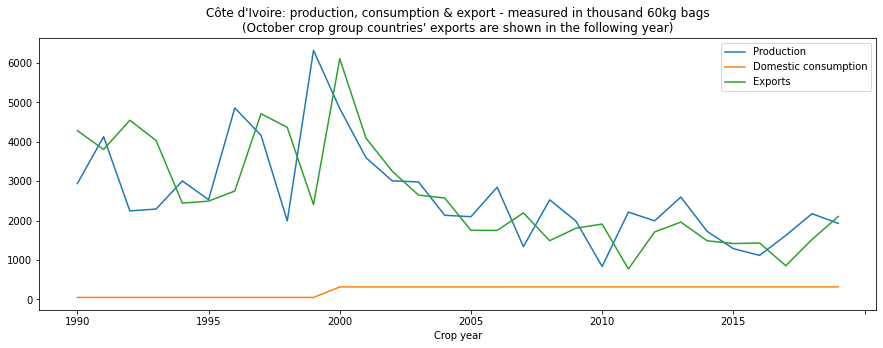

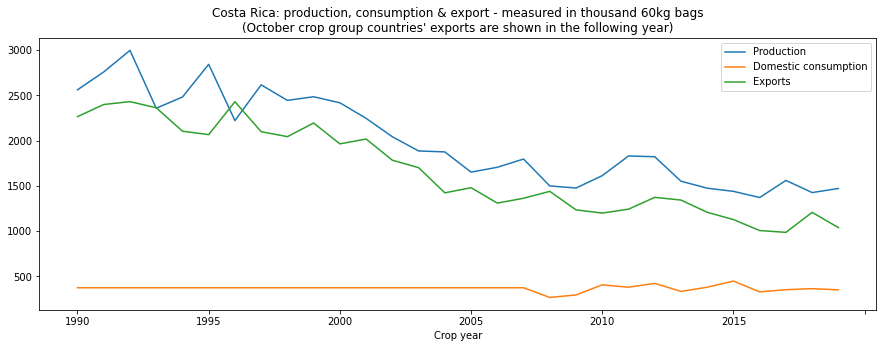

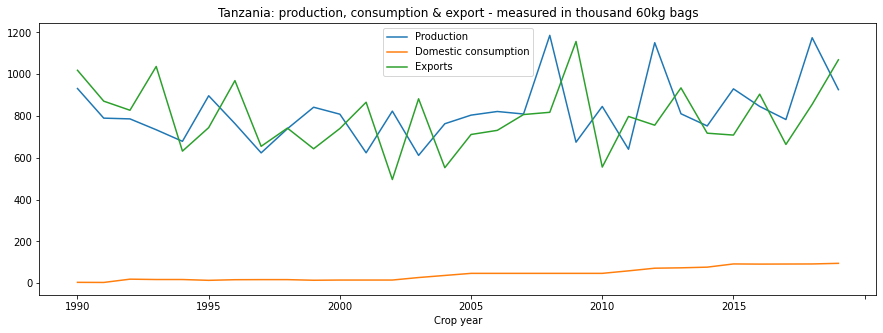

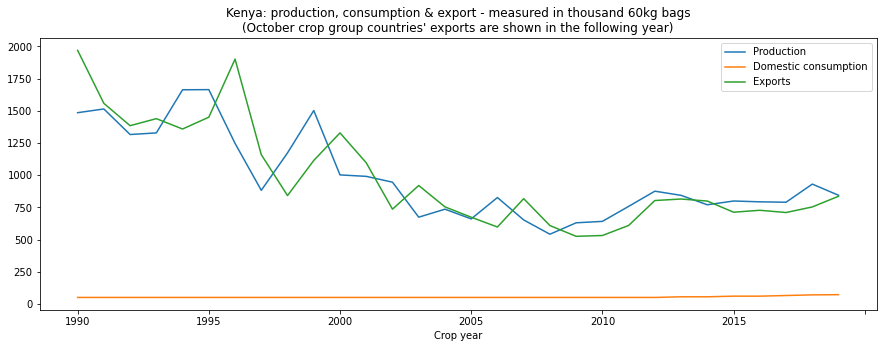

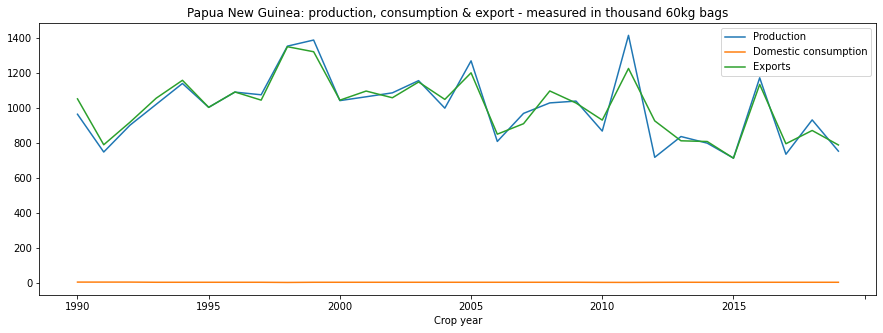

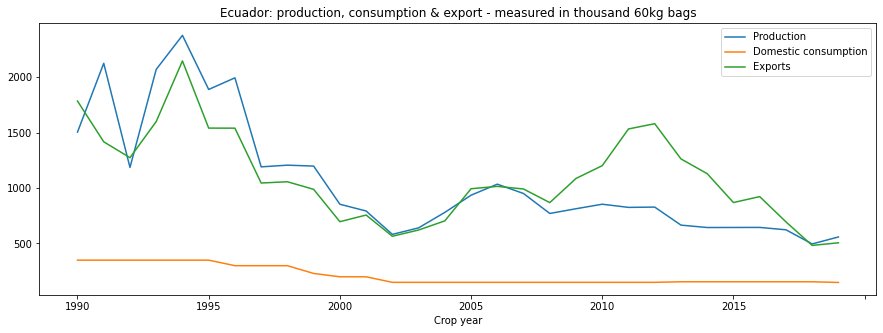

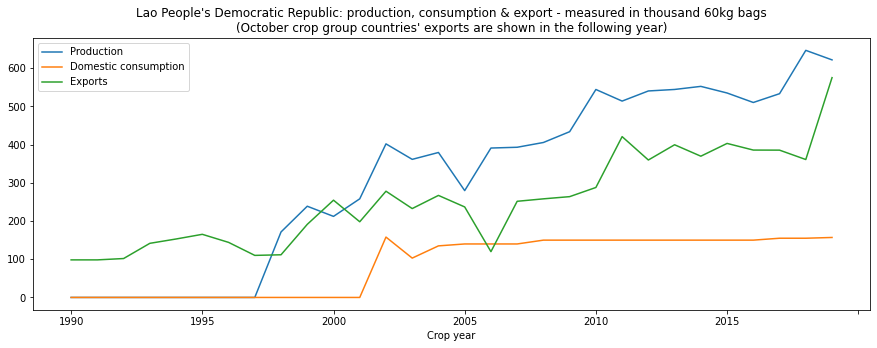

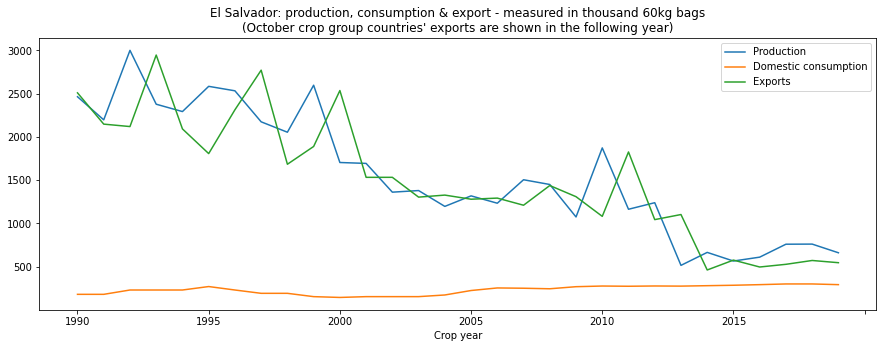

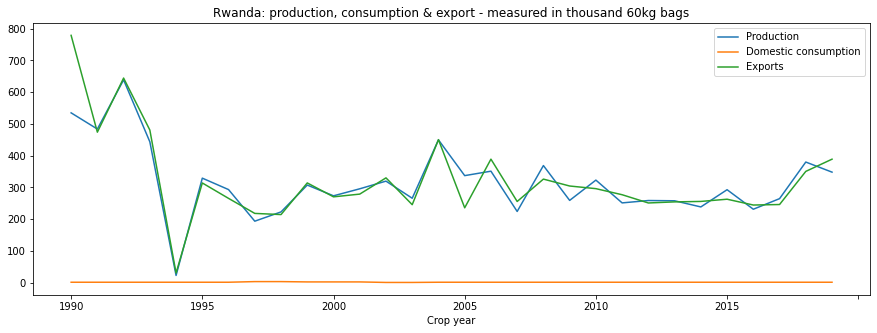

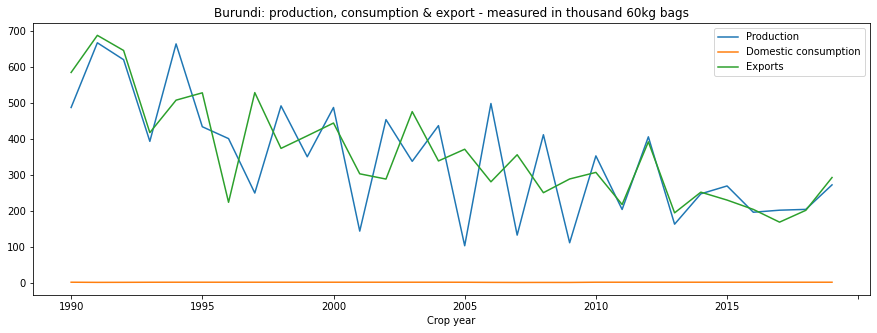

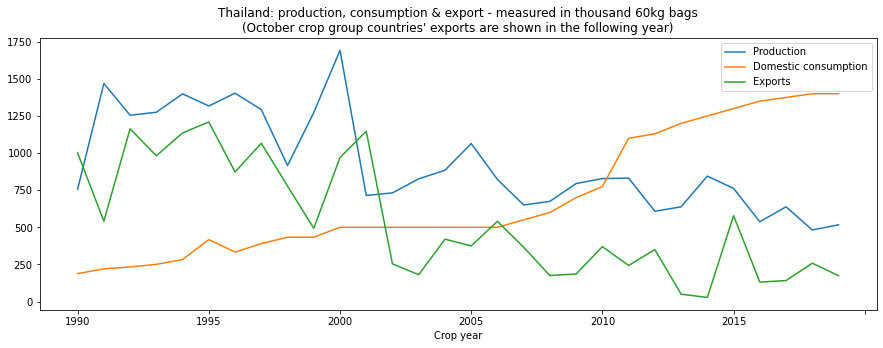

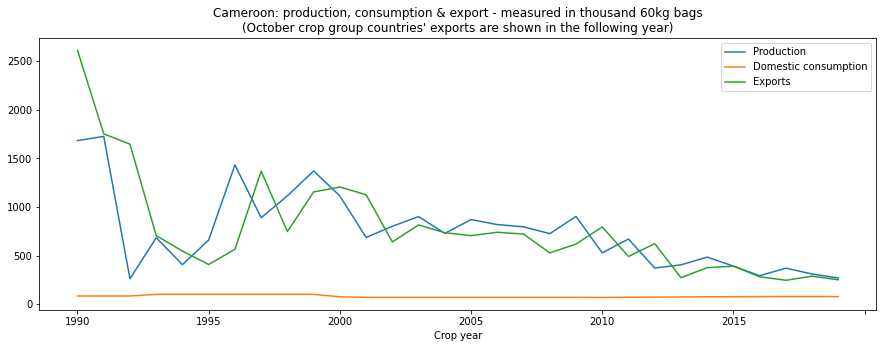

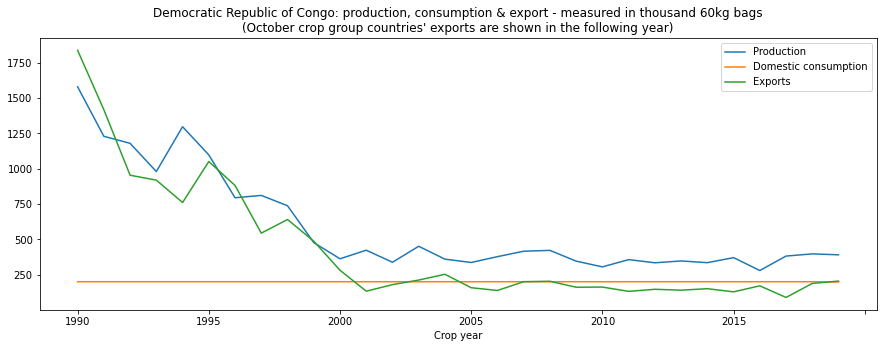

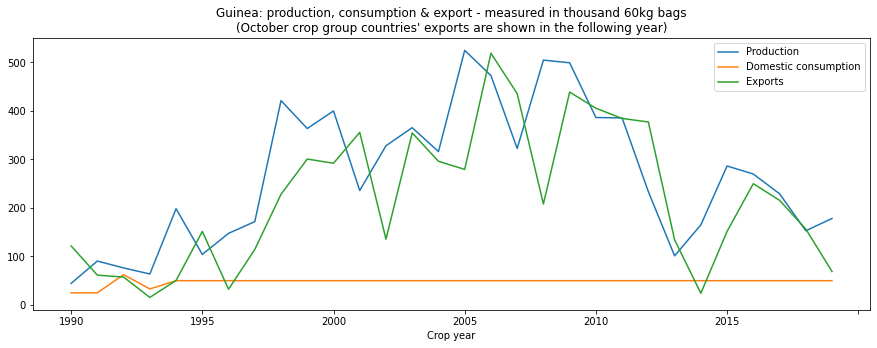

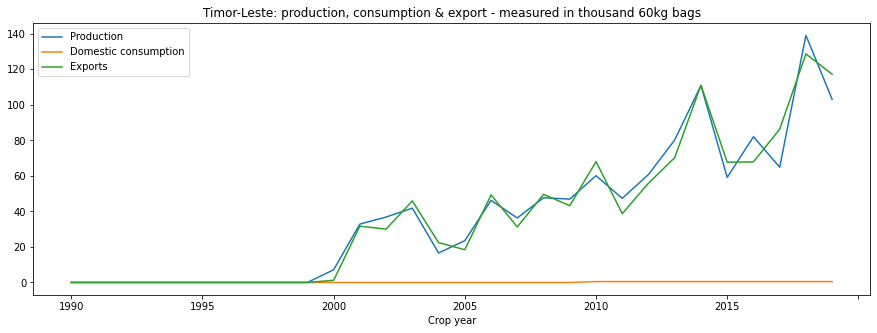

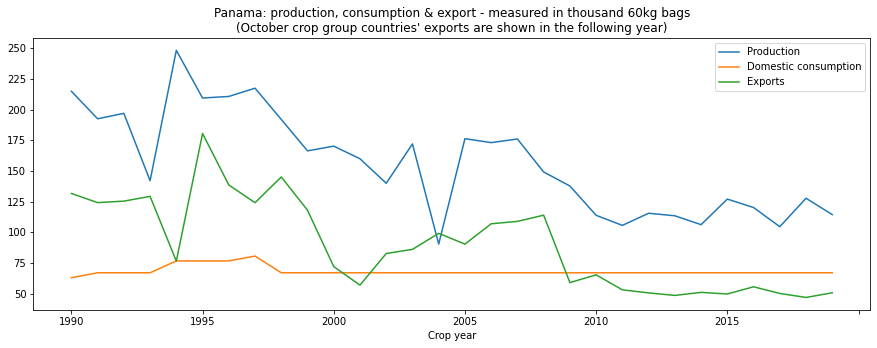

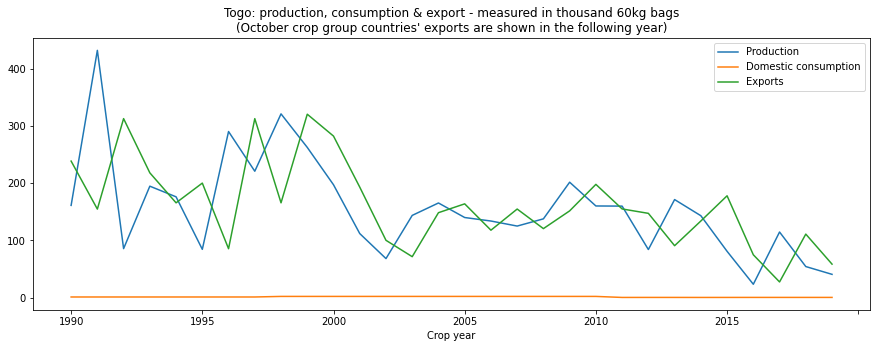

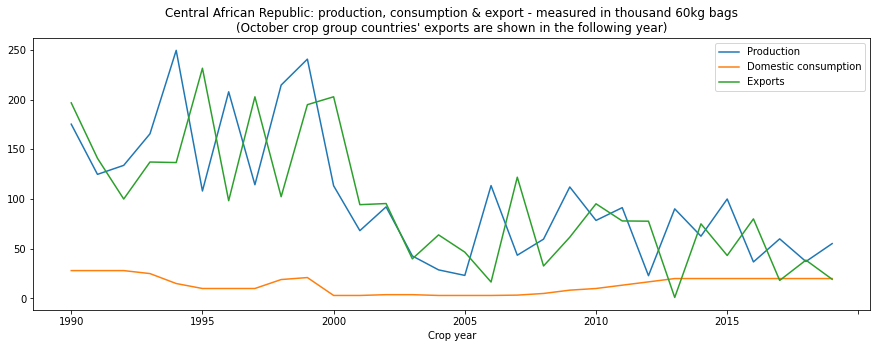

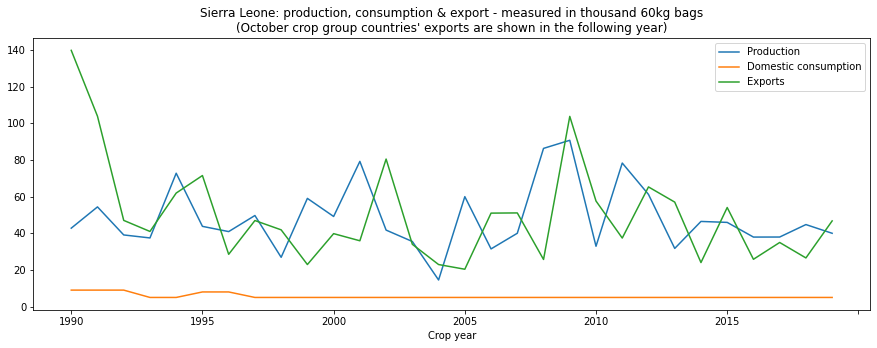

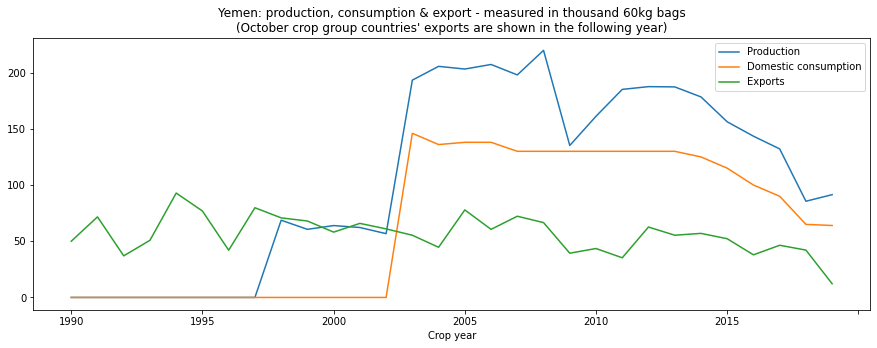

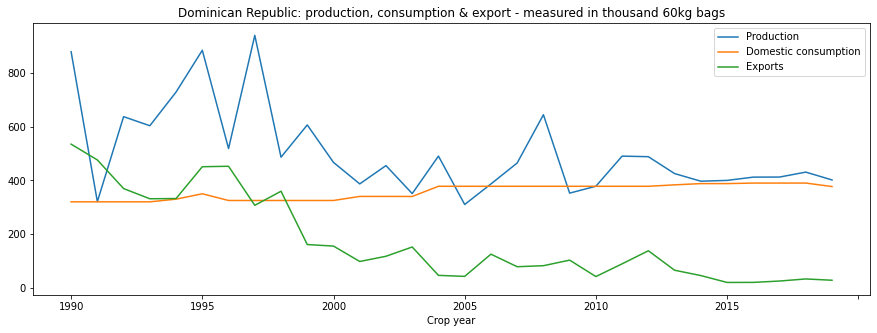

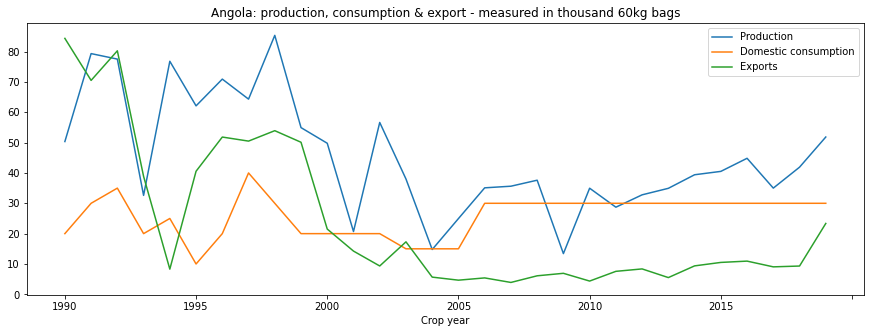

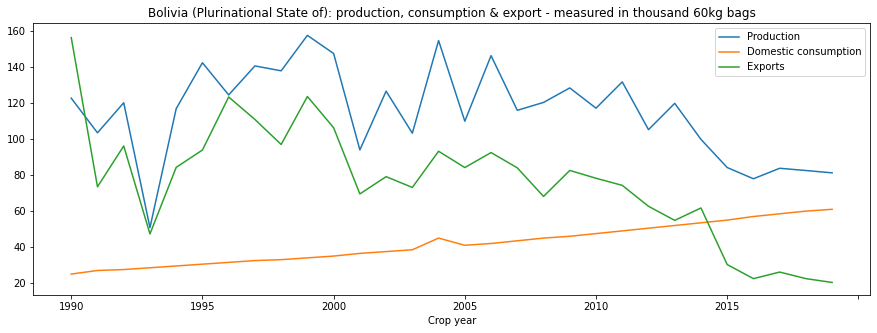

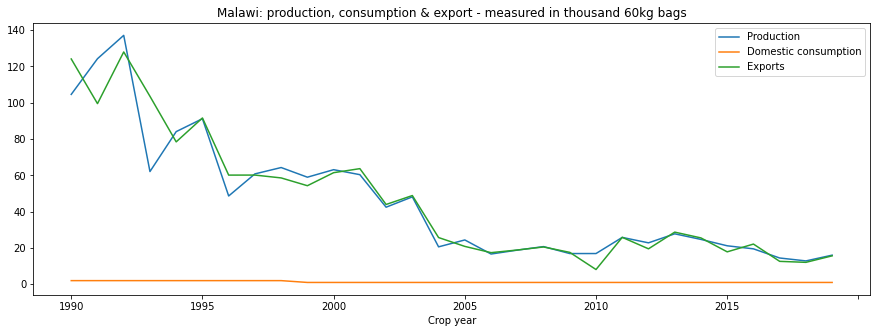

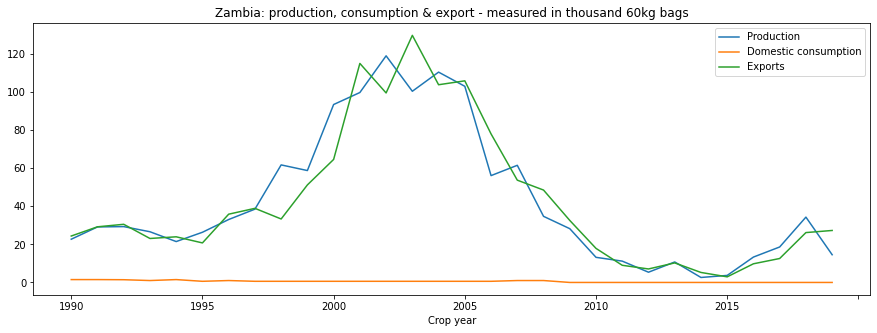

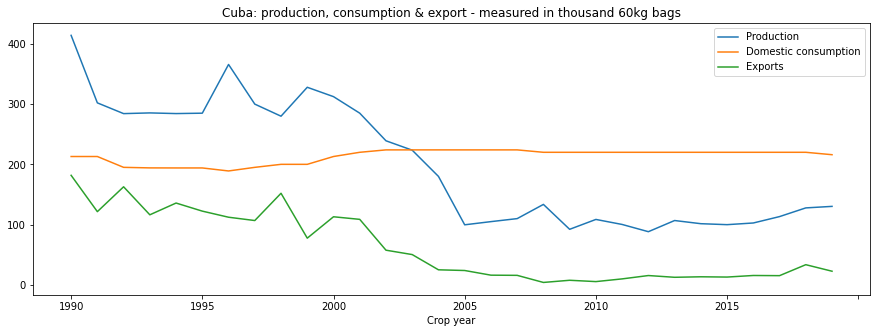

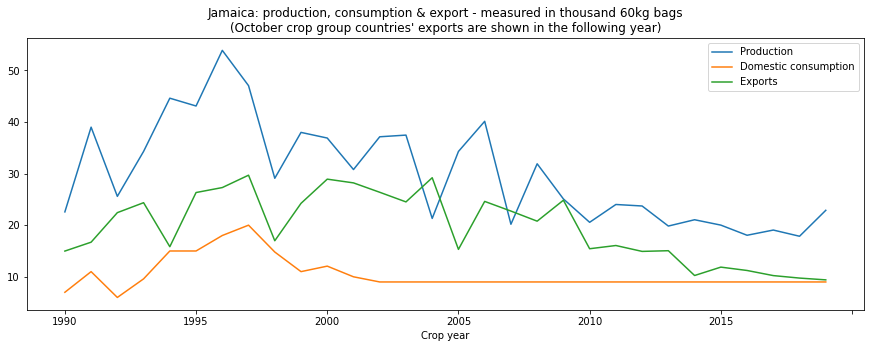

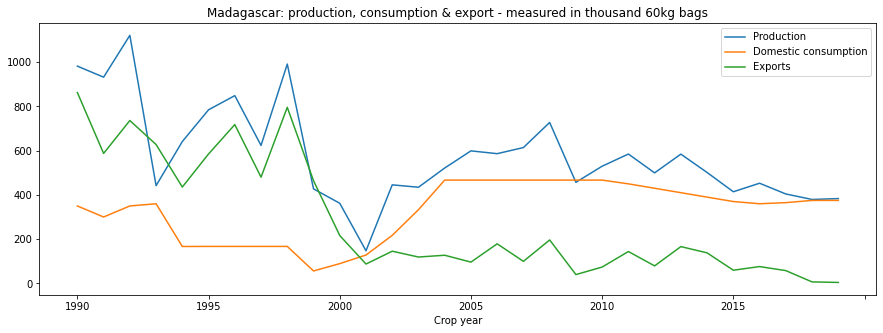

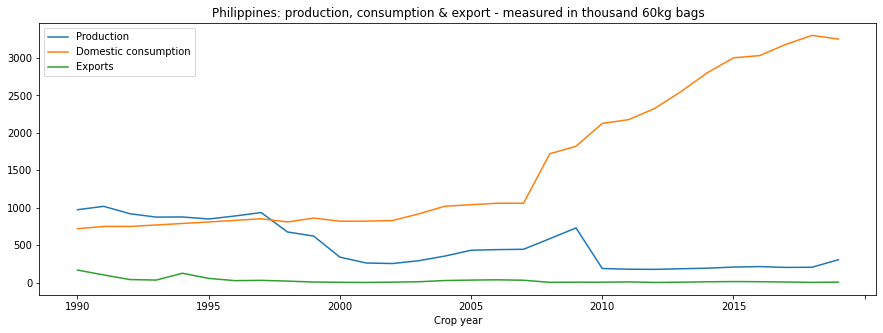

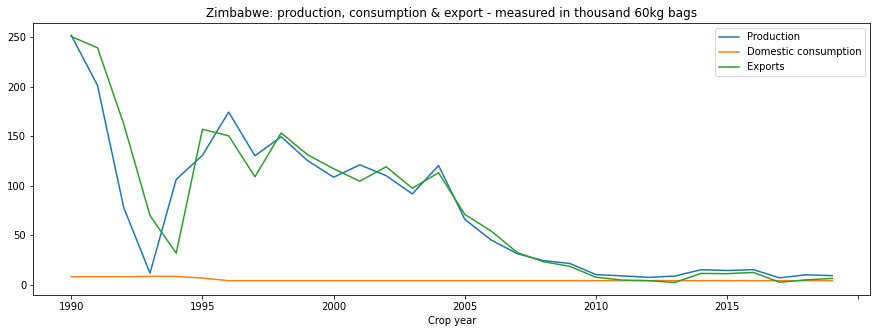

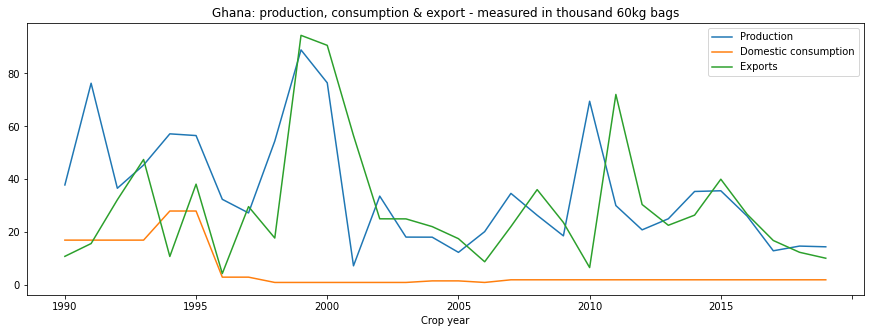

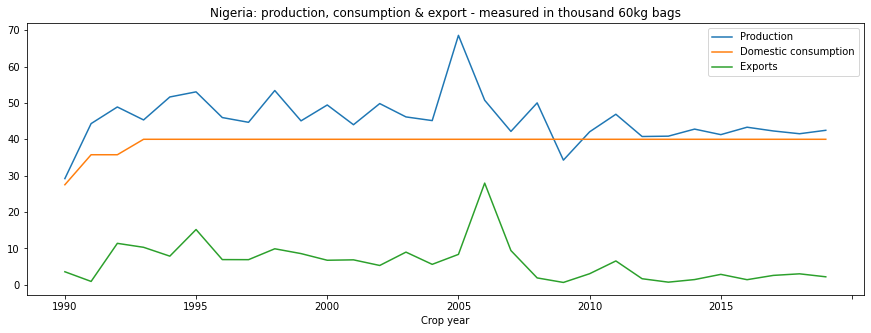

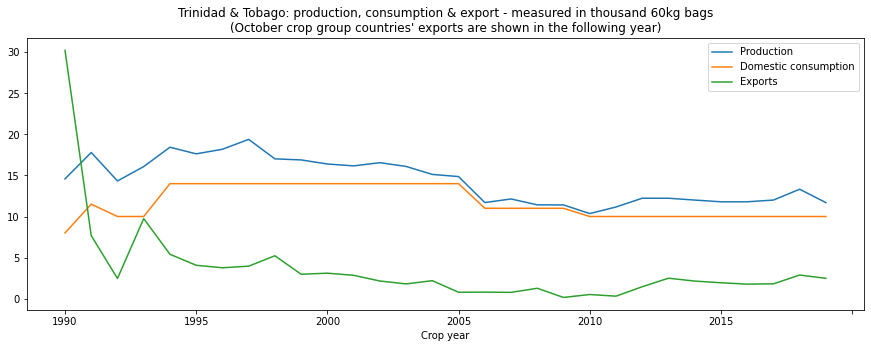

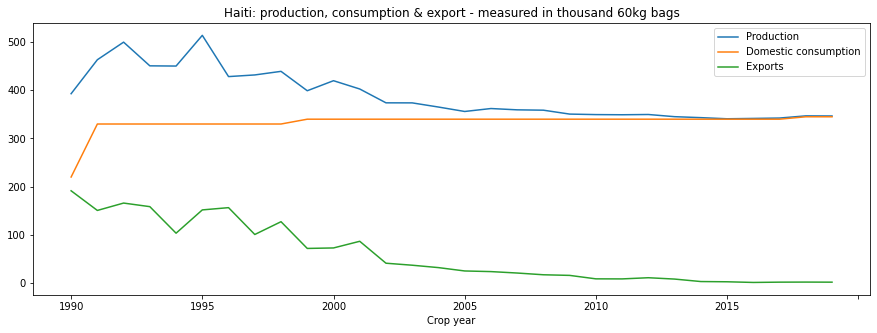

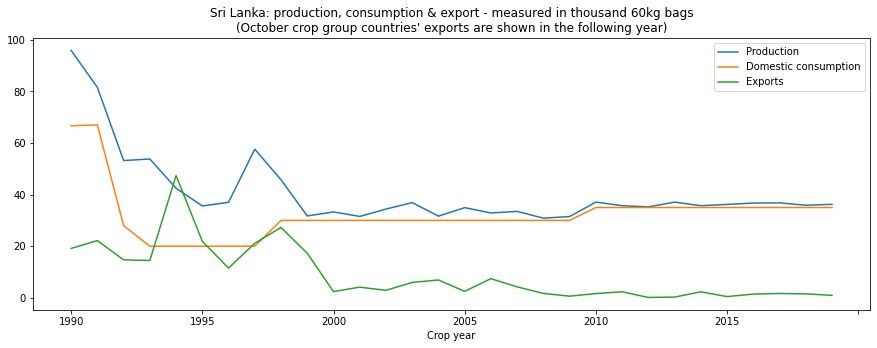

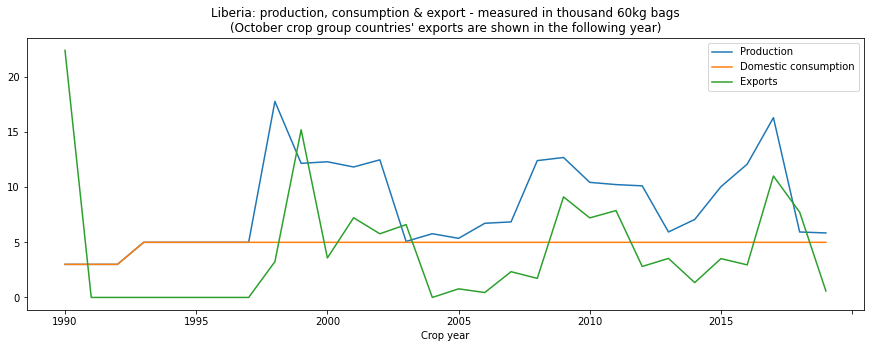

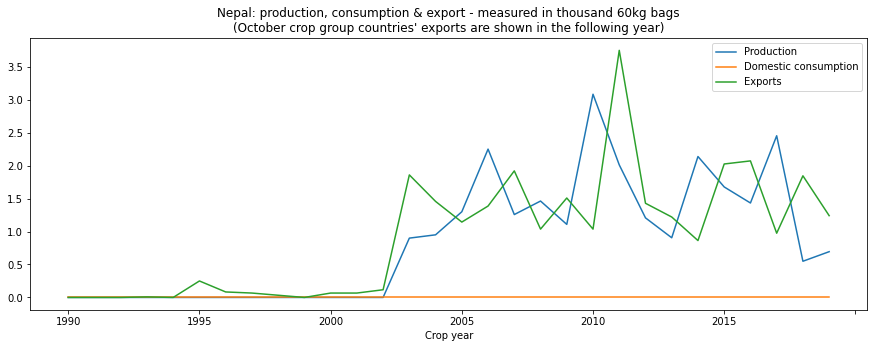

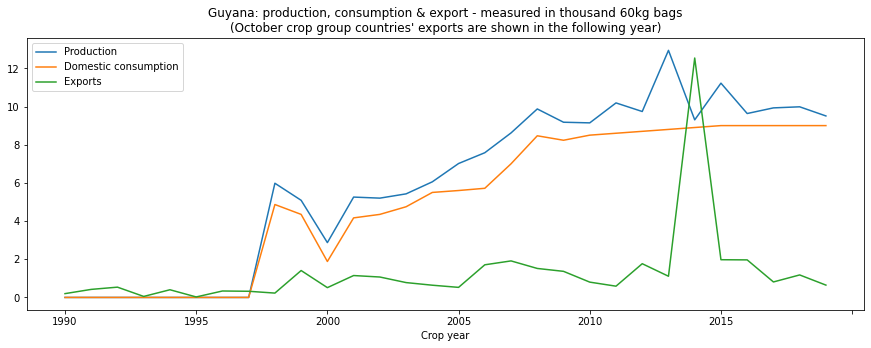

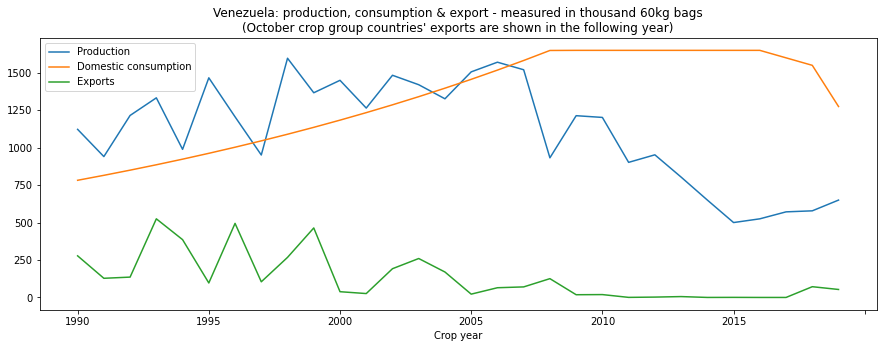

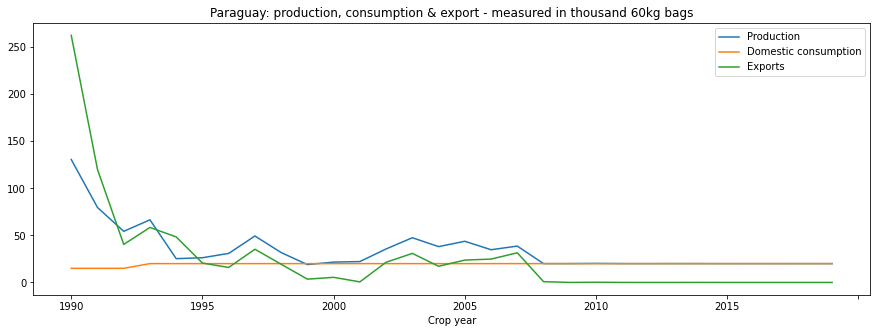

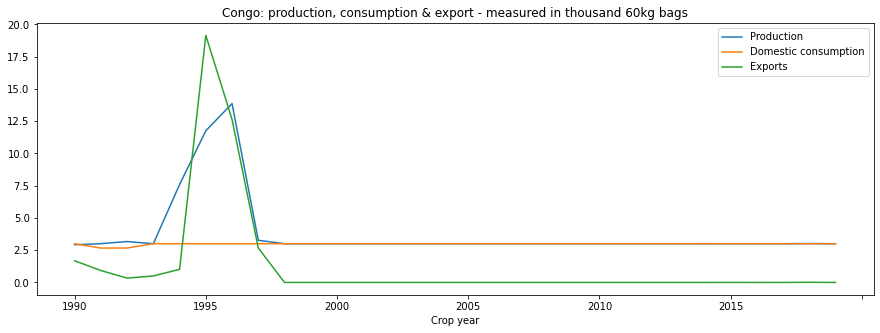

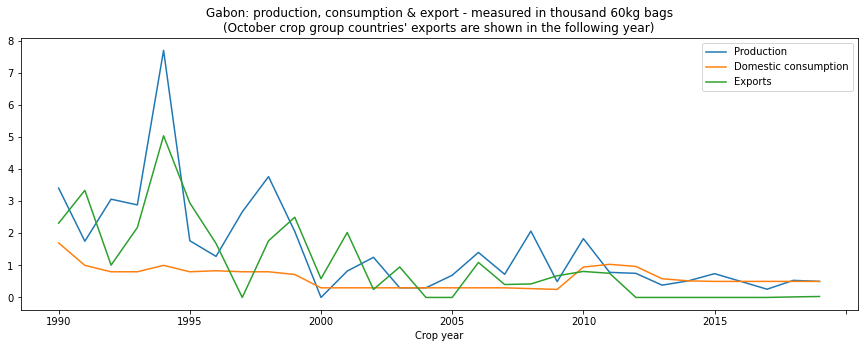

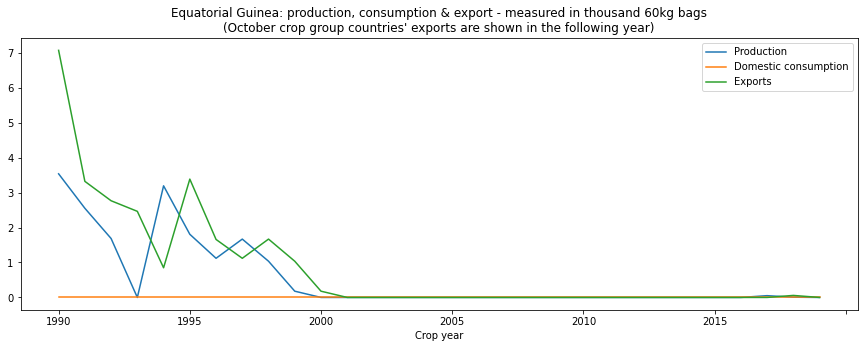

In [16]:
year_list = ["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

oct_group = ['CMR', 'CAF', 'COL', 'CRI', 'CIV', 'COD', 'SLV', 'GNQ', 'ETH', 'GAB', 'GTM', 'GIN', 'GUY', 'HND', 'IND', 'JAM', 'KEN', 'LAO', 'LBR', 'MEX', 'NPL', 'NIC', 'PAN', 'SLE', 'LKA', 'THA', 'TGO', 'TTO', 'UGA', 'VEN', 'VNM', 'YEM']

this_dict = dict()

print(bags2tonnes(10000))

for iso_code in prod_df.index:

    df = iso_code.lower() + "_df"

    this_dict = {
        "Crop year": year_list,
        "Production": [df1a.loc[iso_code][year] for year in year_list],
        "Domestic consumption": [df1b.loc[iso_code][year] for year in year_list],
        "Exports": [df2a.loc[iso_code][year] for year in year_list]
        #"Production": [bags2tonnes(df1a.loc[iso_code][year]) for year in year_list],
        #"Domestic consumption": [bags2tonnes(df1b.loc[iso_code][year]) for year in year_list],
        #"Exports": [bags2tonnes(df2a.loc[iso_code][year]) for year in year_list]
    }
    
    globals()[df] = pd.DataFrame.from_dict(this_dict)
    
    bags_measure = ": production, consumption & export - measured in thousand 60kg bags"
    tonnes_measure = ": production, consumption & export - measured in metric tonnes"

    chart_title = prod_df.loc[iso_code]["country"] + bags_measure

    if iso_code in oct_group:
        chart_title += "\n(October crop group countries' exports are shown in the following year)"

    globals()[df].plot(figsize=(15, 5), x="Crop year").set_title(chart_title)
